In [18]:
import os
import sys
sys.path.append("../..")
from dataset import ptb
from neuralflow import config
config.GPU = True
# import numpy as np
import matplotlib.pyplot as plt
from neuralflow.model import *
from neuralflow.function_class import *
from neuralflow.function import *
from neuralflow.data import *
from neuralflow.optimizer import *
from neuralflow.trainer import *
from neuralflow.gpu import *
from neuralflow.utils import *
np.random.seed(0)

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



In [9]:
# 하이퍼파라미터 설정
batch_size = 20
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 35     # RNN을 펼치는 크기
lr = 20.0
max_epoch = 4
max_grad = 0.25

In [10]:
# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_test, _, _ = ptb.load_data('test')
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]


In [11]:
vocab_size

10000

In [12]:
model = Model(
    EmbeddingLayer(vocab_size, wordvec_size),
    LSTMLayer(wordvec_size, hidden_size),
    DenseLayer(hidden_size, vocab_size)
)

In [13]:
print(model)

0. EmbeddingLayer1 : EmbeddingLayer (10000, 100) 
1. LSTMLayer1 : LSTMLayer (100, 100) 
2. DenseLayer1 : DenseLayer (100, 10000) 



In [14]:
critic = CrossEntropyLoss()
optim = SGDOptimizer(lr)
dataloader = LanguageModelingDataLoader(corpus, batch_size=batch_size, time_size=time_size)

In [15]:
trainer = LanguageModelTrainer(model,
                               critic=critic,
                               optimizer=optim,
                               n_epochs=max_epoch,
                               init_lr=lr)

In [16]:
trainer.train(dataloader, max_grad=max_grad)

epoch 1


  0%|          | 0/1327 [00:00<?, ?it/s]

train loss : 5.599271603005415    train perplexity : 270.229501365324444
epoch 1 -- train loss : 5.880022029680311    train perplexity : 1.227068237157623
--------------------------------
epoch 2


  0%|          | 0/1327 [00:00<?, ?it/s]

train loss : 5.108452367122616    train perplexity : 165.414156287533272
epoch 2 -- train loss : 5.296962413022484    train perplexity : 0.9298279597711379
--------------------------------
epoch 3


  0%|          | 0/1327 [00:00<?, ?it/s]

train loss : 4.962211740507944    train perplexity : 142.909525398713167
epoch 3 -- train loss : 5.0679788037339675    train perplexity : 0.7528876699856802
--------------------------------
epoch 4


  0%|          | 0/1327 [00:00<?, ?it/s]

train loss : 4.978480589125208    train perplexity : 145.253514132869752
epoch 4 -- train loss : 4.907966159486531    train perplexity : 0.6900731943680449
--------------------------------


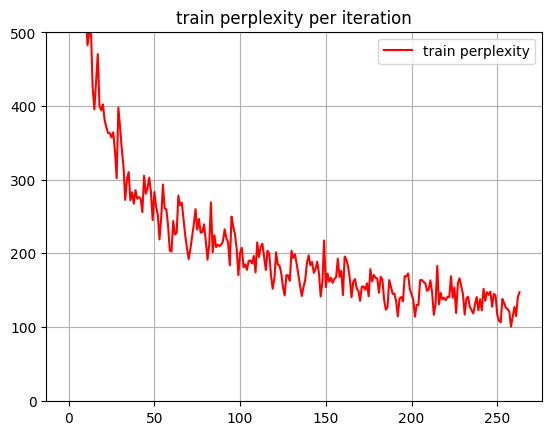

In [17]:
trainer.show_perplexity_graph(show_iter=True)

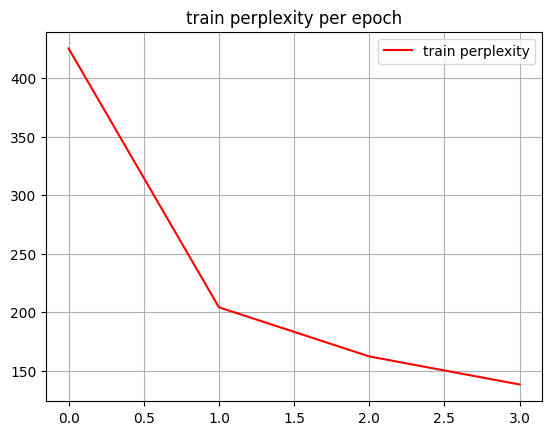

In [11]:
trainer.show_perplexity_graph()